In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

df = pd.read_excel('rnd_contest_data.xlsx', sheet_name="REF raw data", 
                   usecols=["Brand", 'Source','ENERGY LABEL EU', "Sales Units","PRICE UAH/UN.", 
                            "NETFREEZER LTR.", "NETFRIG. LTRS.", "NO. OF DOORS", "DEPTH IN CM", "WIDTH IN CM",
                           "HEIGHT IN CM "])
df = df.replace(to_replace=['B','A', 'A+', 'A++', 'A+++'], value=['0', '1', '2', '3', '4'])
data_traditional = df[df["Source"] == "Traditional Sales"]
internet_sales = df[df["Source"] == "Internet Sales"]

In [28]:
def plot_labelled_scatter(X, y, class_labels, title):

    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)
    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)



In [37]:
def clustering(data):
    
    brand_data = data[data["Brand"] == "SAMSUNG"]
    # Using K-means clustering 
    X1_features = brand_data[["DEPTH IN CM", "WIDTH IN CM", "HEIGHT IN CM "]]
    X1_normalized = StandardScaler().fit(X1_features).transform(X1_features)
    pca = PCA(n_components=2)
    pca.fit(X1_normalized)
    X1 = pca.transform(X1_normalized)  
    kmeans = KMeans(n_clusters = 3, random_state = 0)
    kmeans.fit(X1)
    plot_labelled_scatter(X1, kmeans.labels_, 
                          ['Cluster 1', 'Cluster 2', 'Cluster 3'], "Depth, Width, Height")
    # Using Agglomerative clustering
    X2_features = brand_data[['ENERGY LABEL EU', "PRICE UAH/UN.", "NO. OF DOORS"]]
    X2_normalized = StandardScaler().fit(X2_features).transform(X2_features)
    pca = PCA(n_components=2)
    pca.fit(X2_normalized)
    X2 = pca.transform(X2_normalized)  
    cls = AgglomerativeClustering(n_clusters = 3)
    cls_assignment = cls.fit_predict(X2)
    plot_labelled_scatter(X2, cls_assignment, 
                          ['Cluster 1', 'Cluster 2', 'Cluster 3'], "Price, no. of doors, energy label")
    plt.show()

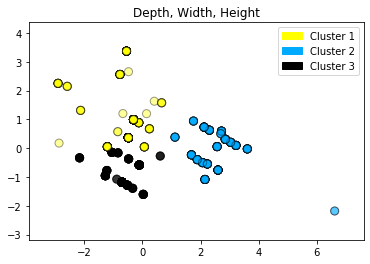

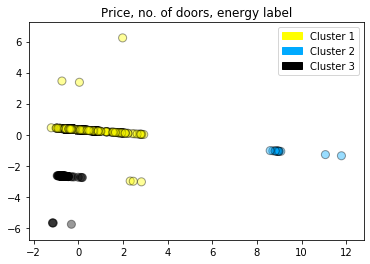

In [38]:
clustering(data_traditional)